**Step 1: Initialize Git Repository**

https://github.com/ypottiez/Numpy-Project

**Step 2: Create Virtual Environment with Anaconda**

Virtual environment: numpyproj.yml (root folder)

**Step 3: Choose & load image**

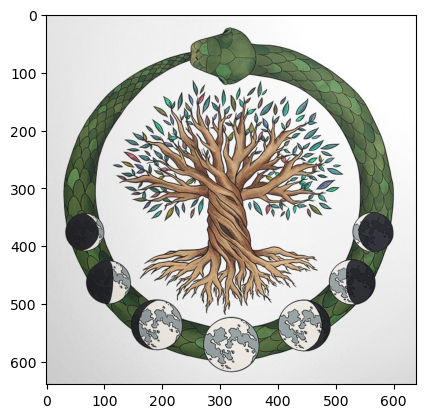

Breedte: 639
Hoogte: 639


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the image directly using Matplotlib
current_path = os.getcwd()
loc_input_img = os.path.join(current_path,'..','data','input' ,'ouroboros.jpg')
image = plt.imread(loc_input_img)

# Display the image using Matplotlib
plt.imshow(image)
plt.show()

# Get the dimensions of the image
height, width, channels = image.shape

# Print the dimensions
print("Breedte:", width)
print("Hoogte:", height)



**Step 4: Do my image manipulations**

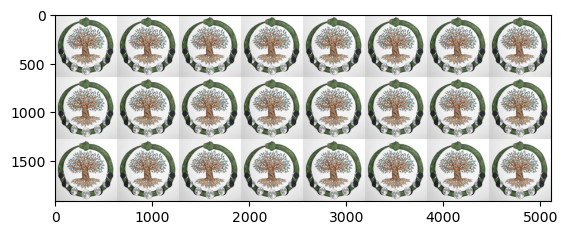

In [3]:
# Definieer het aantal rijen en kolommen in het rooster
rows = 3
columns = 8

# Maak een lege array voor het rooster
grid = np.zeros((height * rows, width * columns, channels), dtype=np.uint8)

# Vul het rooster met de gekopieerde afbeeldingen
for row in range(rows):
    for col in range(columns):
        grid[row * height: (row + 1) * height, col * width: (col + 1) * width] = image

# Toon het resulterende rooster
plt.imshow(grid)
plt.show()

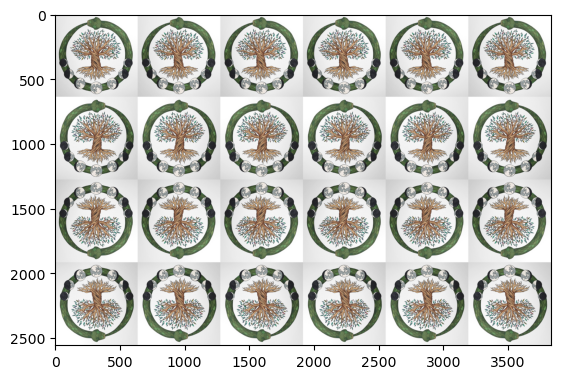

In [4]:
# Definieer het aantal rijen en kolommen in het rooster
rows = 4
columns = 6

# Maak een lege array voor het rooster
grid = np.zeros((height * rows, width * columns, channels), dtype=np.uint8)

# Vul het rooster met de gekopieerde afbeeldingen
for row in range(rows):
    for col in range(columns):
        # Spiegel de afbeelding afhankelijk van de huidige rij
        if row == 1:
            np_image_row = np.fliplr(image)
        elif row == 2:
            np_image_row = np.flipud(image)
        elif row == 3:
            np_image_row = np.flipud(np.fliplr(image))
        else:
            np_image_row = image
        grid[row * height: (row + 1) * height, col * width: (col + 1) * width] = np_image_row

# Toon het resulterende rooster
plt.imshow(grid)
plt.show()

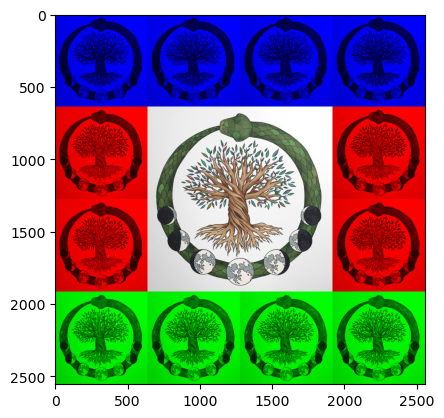

In [8]:
def resize_image(image, scale_factor):
    # Resize the image using numpy's vectorized operations
    new_height = int(image.shape[0] * scale_factor)
    new_width = int(image.shape[1] * scale_factor)
    
    enlarged_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)
    
    for channel in range(image.shape[2]):
        enlarged_image[:,:,channel] = np.repeat(np.repeat(image[:,:,channel], scale_factor, axis=0), scale_factor, axis=1)
    
    return enlarged_image

def overlay_images(background, foreground, position):
    combined_image = np.copy(background)
    
    fg_height, fg_width, _ = foreground.shape
    
    x, y = position
    
    x_start = max(0, x)
    x_end = min(background.shape[1], x + fg_width)
    y_start = max(0, y)
    y_end = min(background.shape[0], y + fg_height)
    
    combined_image[y_start:y_end, x_start:x_end] = foreground[:y_end-y_start, :x_end-x_start]
    
    return combined_image

# Example usage:
scale_factor = 2
enlarged_image = resize_image(image, scale_factor)

tiled_img = np.tile(image, (1, 4, 1))
blue_f = tiled_img.copy()
blue_f[:,:,[0,1]] = 0
red_f = tiled_img.copy()
red_f[:,:,[1,2]] = 0
green_f = tiled_img.copy()
green_f[:,:,[0,2]] = 0
stacked_image = np.concatenate((blue_f, red_f, red_f, green_f), axis=0)

position = (639, 639)
result_image = overlay_images(stacked_image, enlarged_image, position)

plt.imshow(result_image)
plt.show()


**Step 5: Generalize these manipulations**

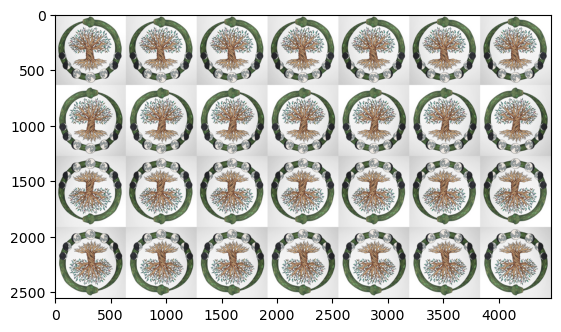

In [7]:
def grid_with_flips(image, matrix):
    # Define the height, width, and channels of the image
    height = image.shape[0]
    width = image.shape[1]
    channels = image.shape[2]
    
    # Define the number of rows and columns in the grid
    rows = len(matrix)
    columns = len(matrix[0])
    
    # Create an empty array for the grid
    grid = np.zeros((height * rows, width * columns, channels), dtype=np.uint8)
    
    # Fill the grid with the flipped images based on the matrix
    for row in range(rows):
        for col in range(columns):
            flip_type = matrix[row][col]
            if flip_type == 1:
                np_image_row = np.fliplr(image)
            elif flip_type == 2:
                np_image_row = np.flipud(image)
            elif flip_type == 3:
                np_image_row = np.flipud(np.fliplr(image))
            else:
                np_image_row = image
            grid[row * height: (row + 1) * height, col * width: (col + 1) * width] = np_image_row
    
    # Show the resulting grid
    plt.imshow(grid)
    plt.show()

# Example usage:
# Create a matrix representing the flips
matrix = [[j for i in range(7)] for j in range(4)]
# Call the function with the image and the matrix
grid_with_flips(image, matrix)


**Step 6: Your own manipulations**

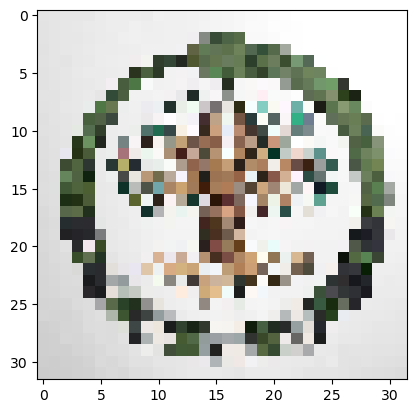

In [19]:
plt.imshow(image[::20, ::20, :])
plt.show()

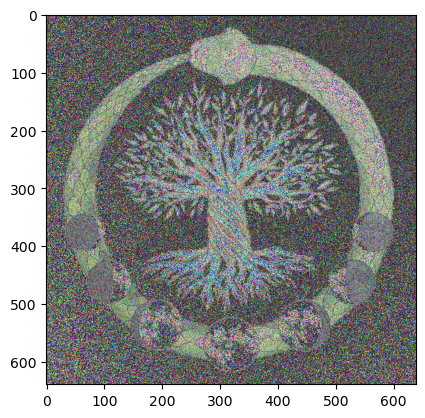

In [20]:
f_blurred = image.copy()
lb = 0
ub = 150
height,width = f_blurred.shape[:2] #get width and height of image
f_blurred[:,:,0] += np.random.randint(lb, ub, (height, width), dtype = 'uint8')
f_blurred[:,:,1] += np.random.randint(lb, ub, (height, width), dtype = 'uint8')
f_blurred[:,:,2] += np.random.randint(lb, ub, (height, width), dtype = 'uint8')
plt.imshow(f_blurred)
plt.show()